# ARIM情報活用講座：　基礎編　
# 第4回：　Scikit-learn（予測）


## 本編の目標

Boston Housingデータセットを使って機械学習の予測タスクを、以下の視点で学びます。

1. 回帰分析の学習: Boston Housingデータセットは、住宅価格の中央値（MEDV）を予測するためのデータが含まれています。このデータセットを使用して回帰モデルを構築し、住宅価格の予測方法や関連する特徴量の重要性を理解することができます。

2. 特徴量の重要性の評価: データセットに含まれる13種類の特徴量（犯罪率、部屋数など）を分析し、住宅価格にどの特徴量が最も影響を与えるのかを評価することができます。特徴量の重要性の理解は、データの特性や予測モデルの解釈に役立ちます。

3. モデルの評価と改善: Boston Housingデータセットを使用して機械学習モデルを構築し、その性能を評価することができます。モデルの評価指標（平均二乗誤差など）を使用してモデルの性能を測定し、さらに改善を試みることができます。

4. データ前処理の学習: Boston Housingデータセットは実際のデータであり、欠損値や異常値、特徴量のスケーリングなどのデータ前処理の課題が存在します。このデータセットを使用して、データの前処理手法を学び、適切なデータクリーニングやスケーリングを行う方法を習得することができます。

5. 機械学習アルゴリズムの比較: Boston Housingデータセットを使用して、異なる機械学習アルゴリズム（線形回帰、決定木、ランダムフォレストなど）を適用し、それらの性能や予測精度を比較することができます。これにより、機械学習アルゴリズムの選択とその適用方法についての理解を深めることができます。
6. 
## データセット
Boston Housingデータセットは、1970年代初頭にアメリカのマサチューセッツ州ボストン市で収集された住宅価格に関する情報を含むデータセットです。このデータセットは、機械学習や統計分析の研究で広く使用されてきました。

Boston Housingデータセットには、506の異なる地域（郊外）の住宅に関する情報が含まれています。各地域には、住宅価格を予測するための13種類の特徴があります。。

* CRIM： 町別の「犯罪率」
* ZN： 25,000平方フィートを超える区画に分類される住宅地の割合＝「広い家の割合」
* INDUS： 町別の「非小売業の割合」
* CHAS： チャールズ川のダミー変数（区画が川に接している場合は1、そうでない場合は0）＝「川の隣か」
* NOX： 「NOx濃度（0.1ppm単位）」＝一酸化窒素濃度（parts per 10 million単位）。この項目を目的変数とする場合もある
* RM： 1戸当たりの「平均部屋数」
* AGE： 1940年より前に建てられた持ち家の割合＝「古い家の割合」
* DIS： 5つあるボストン雇用センターまでの加重距離＝「主要施設への距離」
* RAD： 「主要高速道路へのアクセス性」の指数
* TAX： 10,000ドル当たりの「固定資産税率」
* PTRATIO： 町別の「生徒と先生の比率」
* BLACK： 「1000(Bk - 0.63)」の二乗値。Bk＝「町ごとの黒人の割合」を指す
* LSTAT： 「低所得者人口の割合」
* MEDV：「住宅価格」（1000ドル単位）の中央値。通常はこの数値が目的変数として使われる


【利用にあたっての注意】
Boston Housingデータセットは、住宅価格の予測や地域の特徴の関係性の分析など、さまざまな機械学習のタスクに使用されてきました。しかし、「黒人の割合」などの差別的なデータを含んでいるため，Scikit learnのversion 1.0以降から利用は非推奨となりました。

このようにオープンソースのデータセットであっても、時代とともに時代にそぐわなくなるデータもあることを念頭におきながら、データ解析をする必要もあります。

# 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（Google colabに接続しない場合には不要）

In [ ]:
!git clone https://github.com/ARIM-Training/Training_python_4.git
%cd Training_python_4

# 1.データセットの読み込み

### ライブラリのインポート

In [1]:
#データ構造化ライブラリ
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### サンプルファイルの読み込み

In [2]:
#データセットの読み込み
df = pd.read_csv('data/dataset/Boston.csv', index_col=0)

In [3]:
#データセットの中身を確認しましょう
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#　記述子（特徴量）の選定および削除
# ここでは、分析において不適正な説明変数として”black”を削除します。

df = df.drop(['black'],axis = 1)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


# 2. 探索的データ分析（データの俯瞰）

In [5]:
#概要統計: 平均値、中央値、標準偏差、パーセンタイルなどの指標を計算し、変数の中心傾向とばらつきを理解します。
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


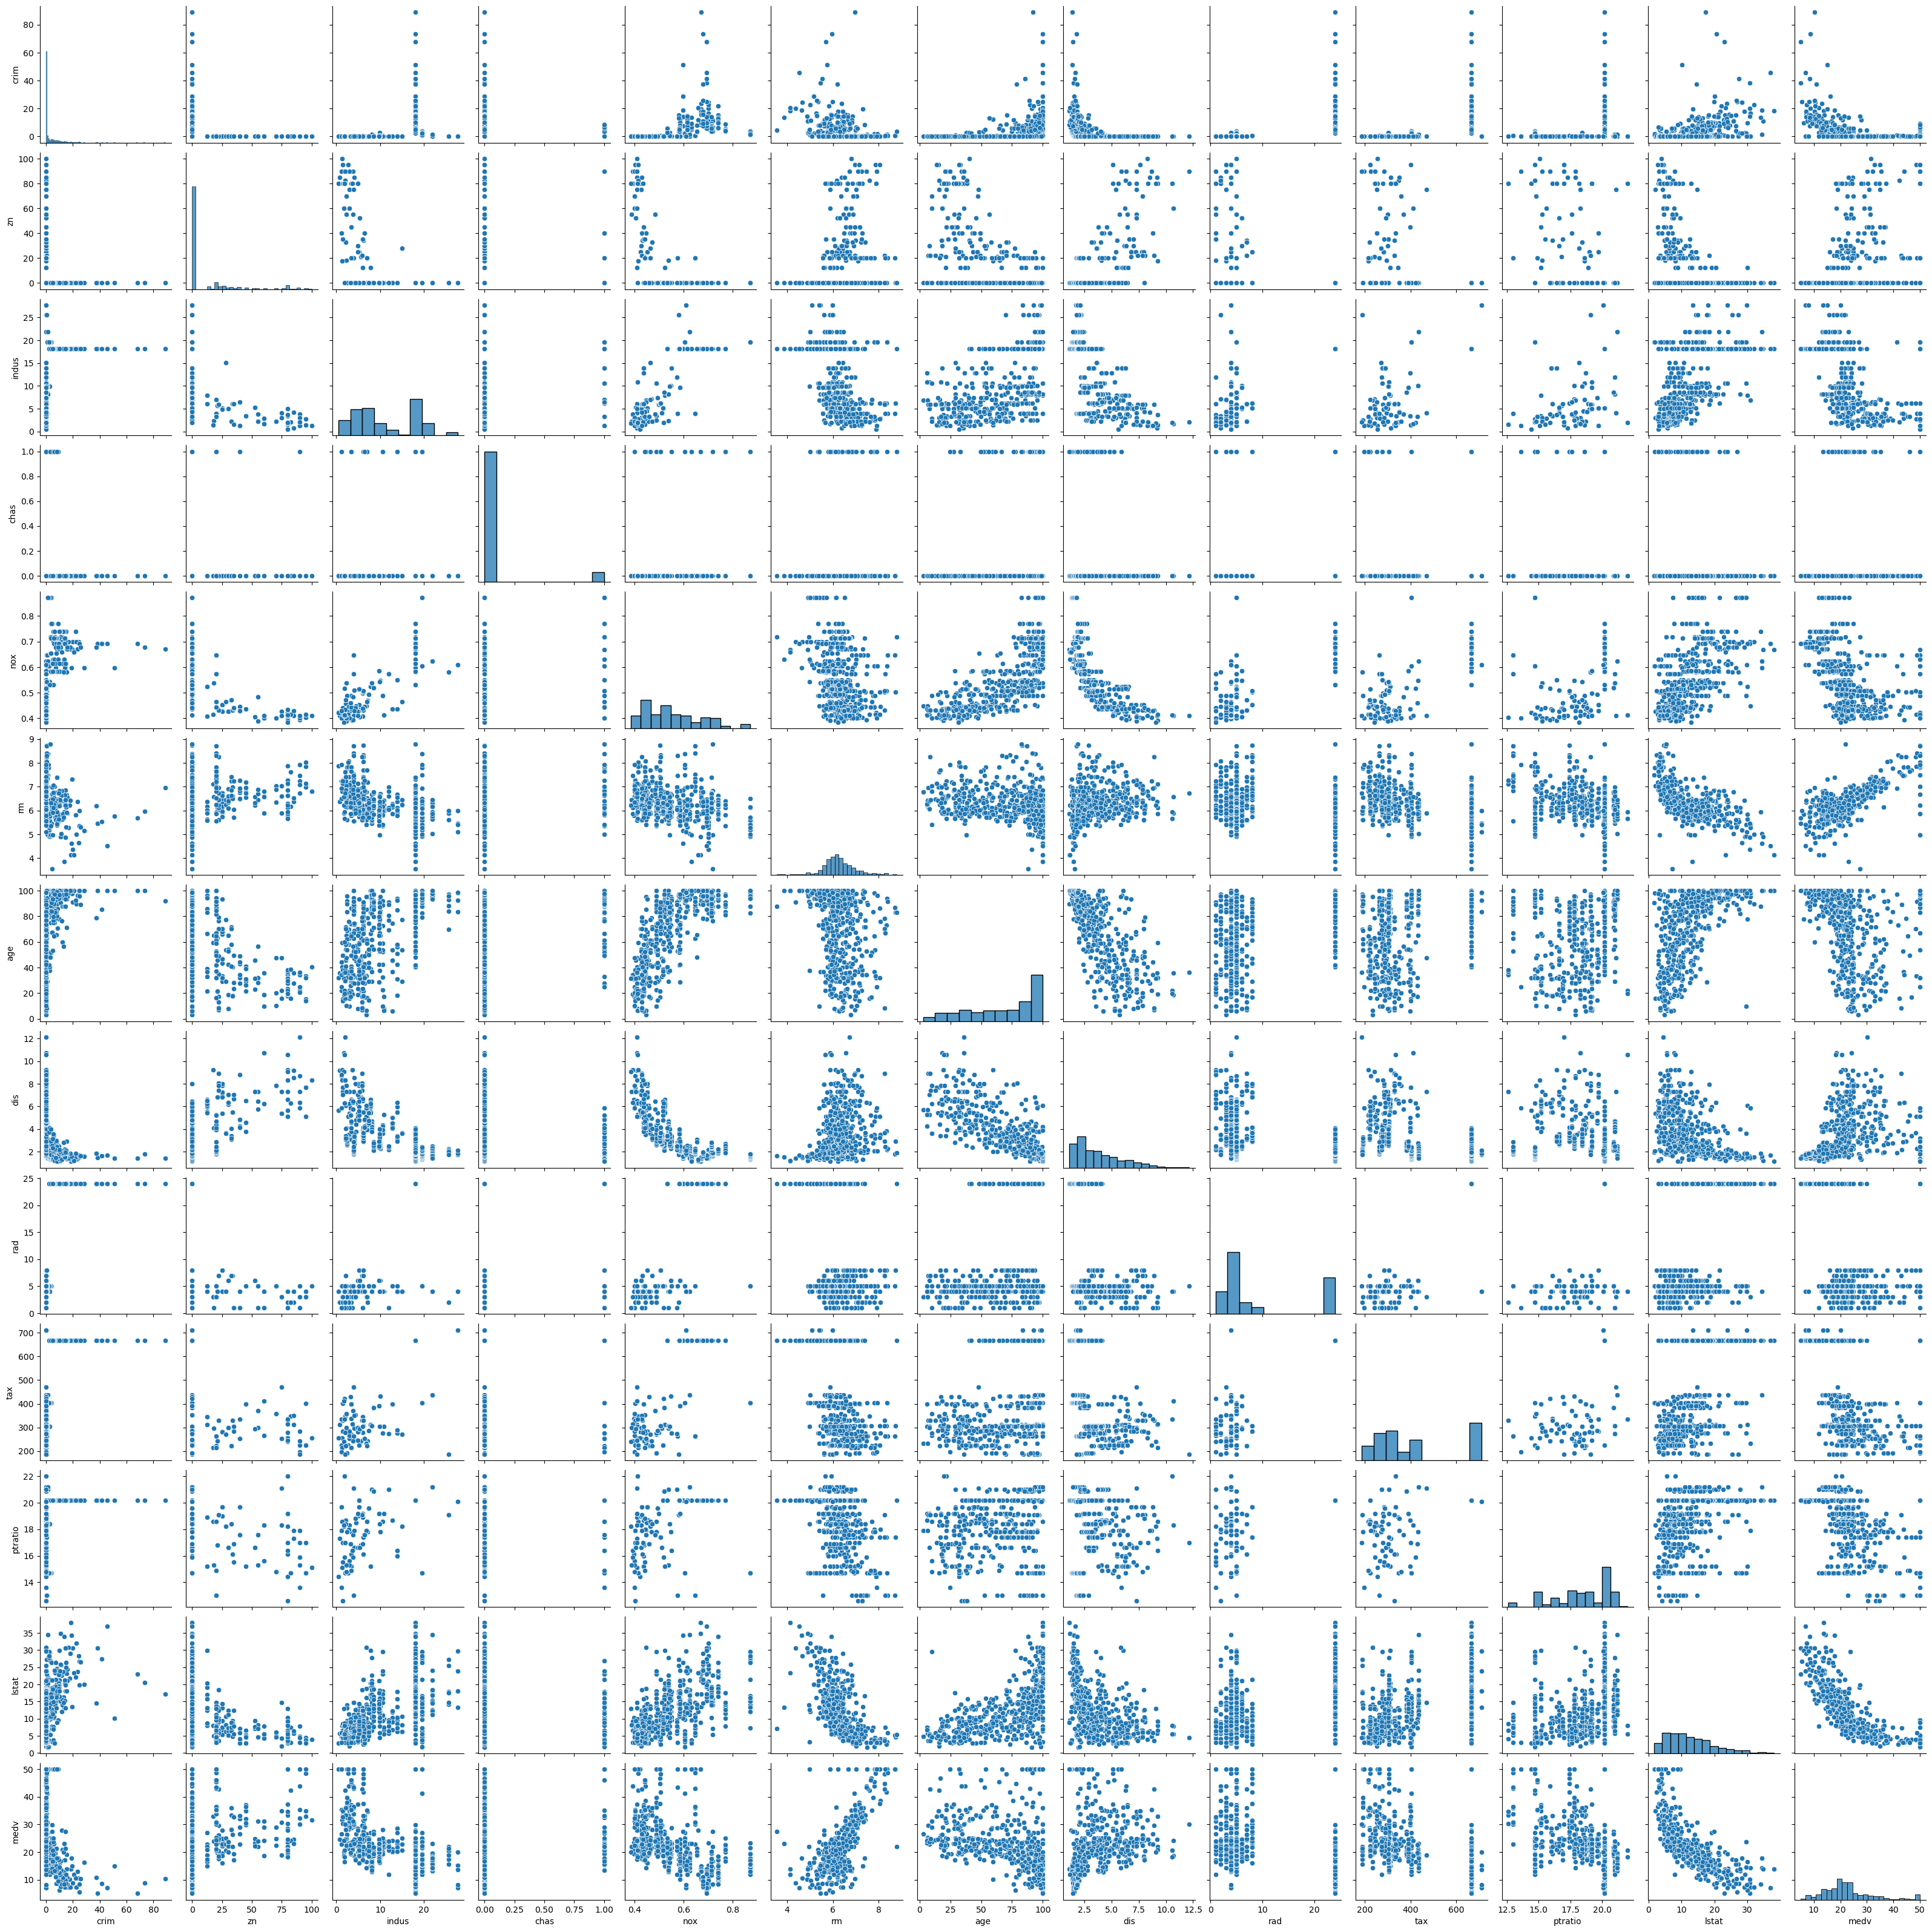

In [6]:
#　ペアプロットによる各変数間の二次元空間像
sns.pairplot(df)
plt.show()

表示させる変数名を絞り込んでみましょう。`pairplot()`のメソッドでは次のようにデータフレームの変数名を指定することで対応できます。

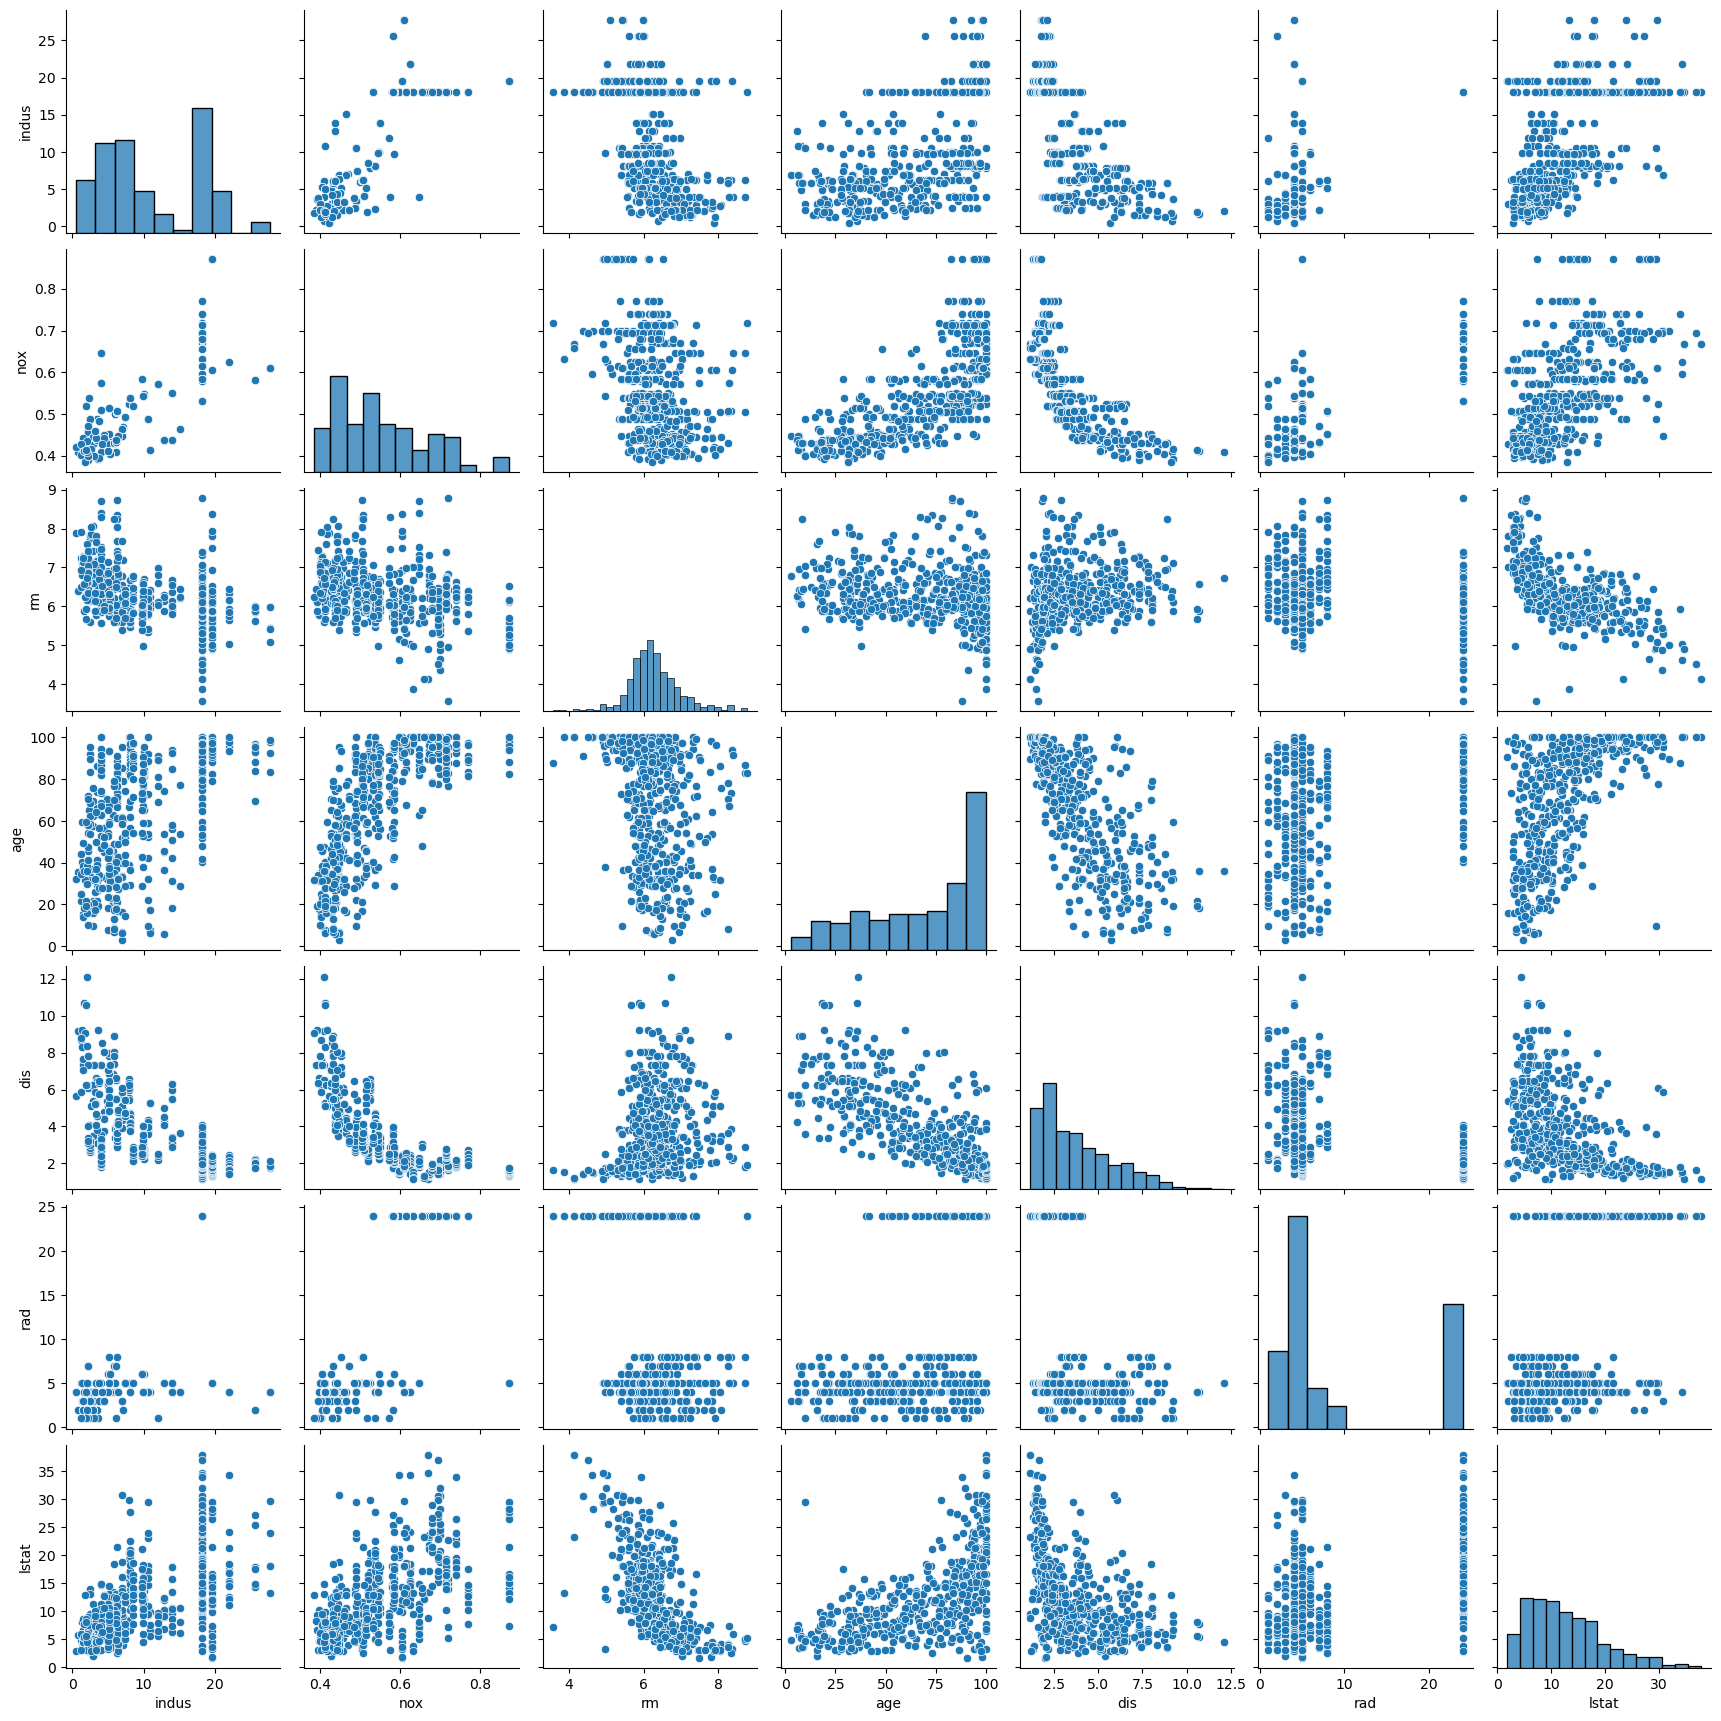

In [7]:
TARGET=['indus','nox','rm','age','dis','rad','lstat']
sns.pairplot(df[TARGET])
plt.show()

### ピアソン相関係数

ピアソンの相関係数は、特徴量選択の補助パラメータとして最も一般的なもので、2つの変数XとYの間の線形相関を示す。


In [8]:
#　相関係数
corr = df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


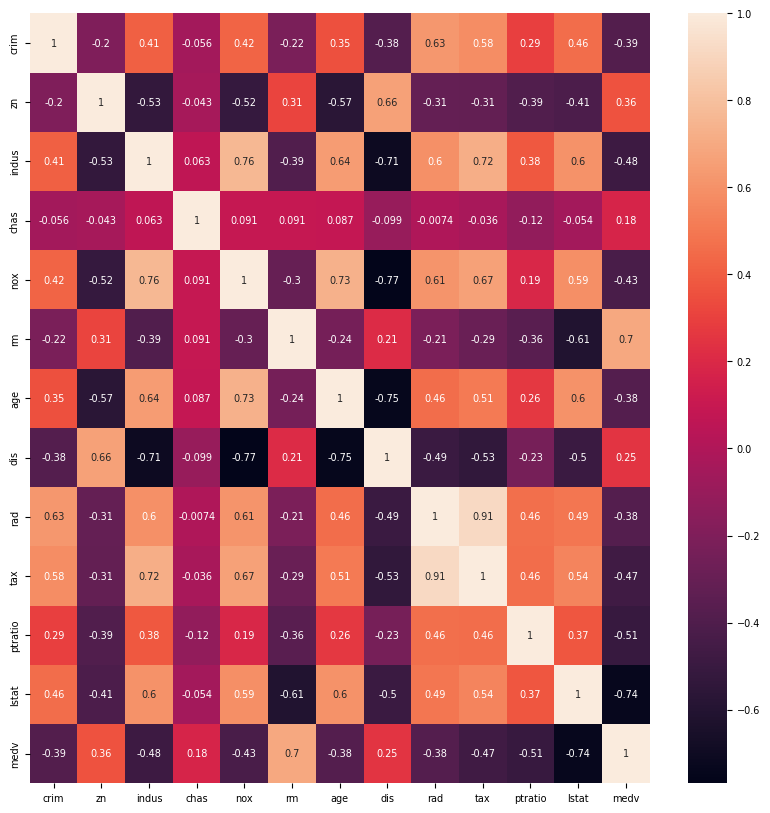

In [9]:
#相関係数をヒートマップ化する
plt.figure(figsize=(10,10))
plt.rcParams["font.size"] = 7

sns.heatmap(corr, annot=True)
plt.show()

# 3.グラフの一例

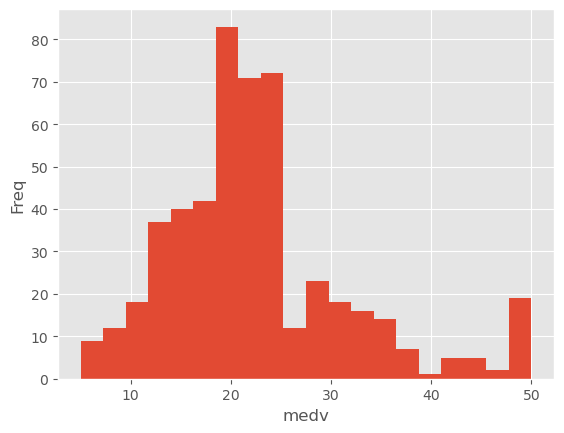

In [10]:
# 住宅価格のヒストグラム
plt.style.use('ggplot')

#ビン数は20分割
plt.hist(df['medv'], bins = 20)

#ラベル名
plt.xlabel(df.columns[12])
plt.ylabel('Freq')
plt.show()

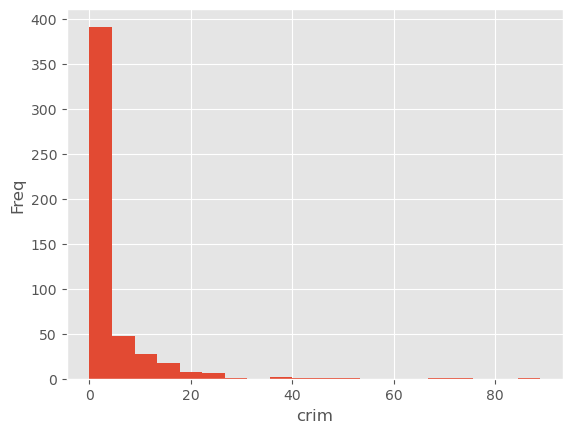

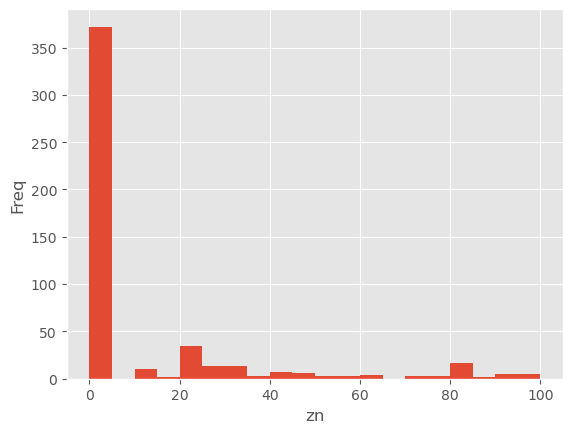

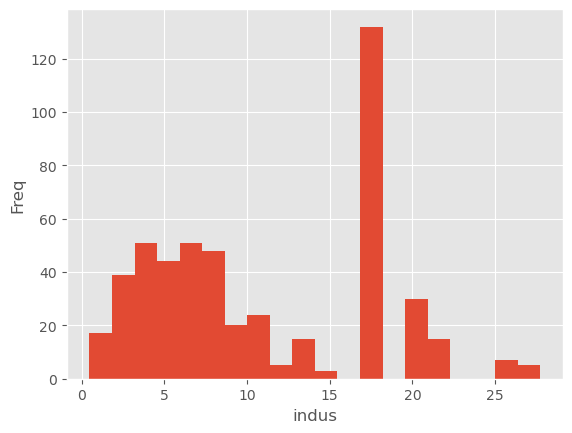

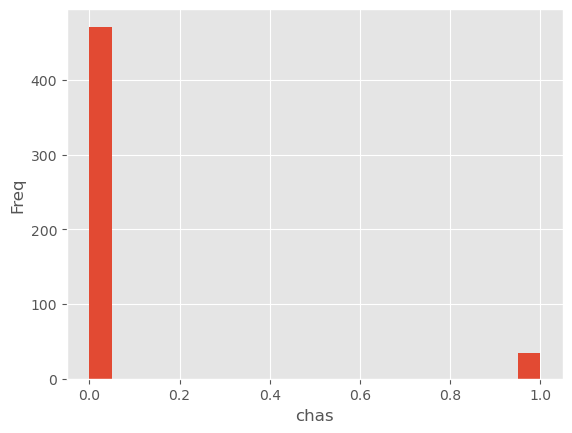

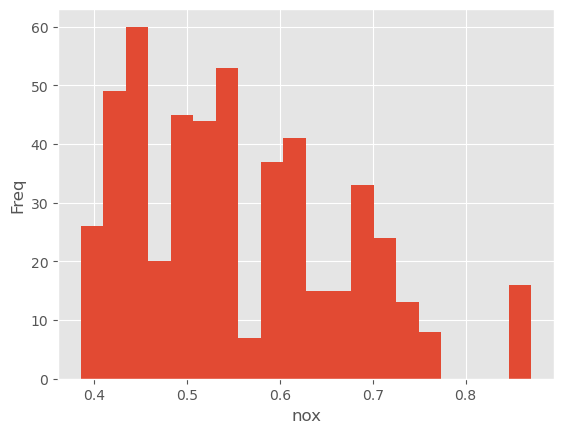

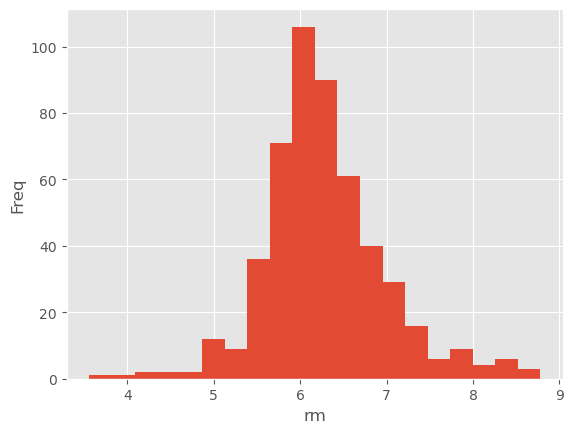

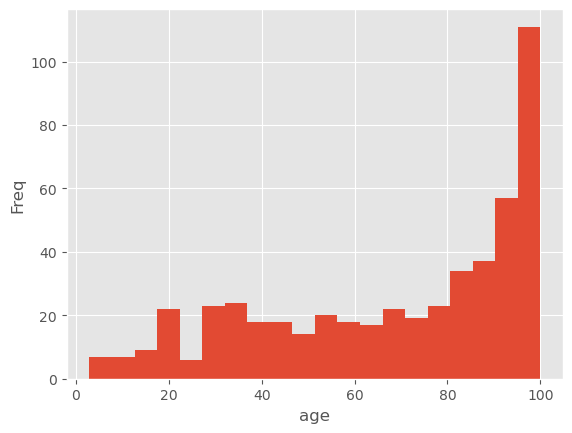

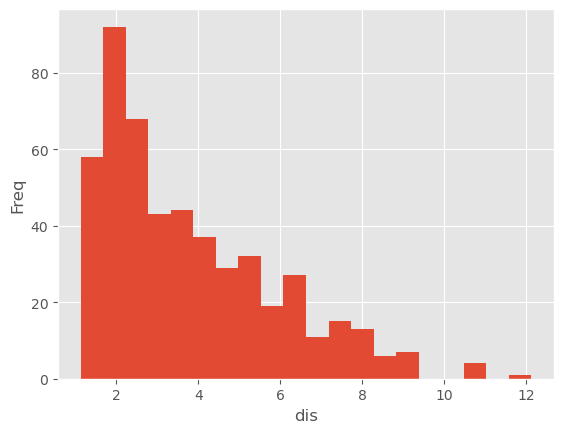

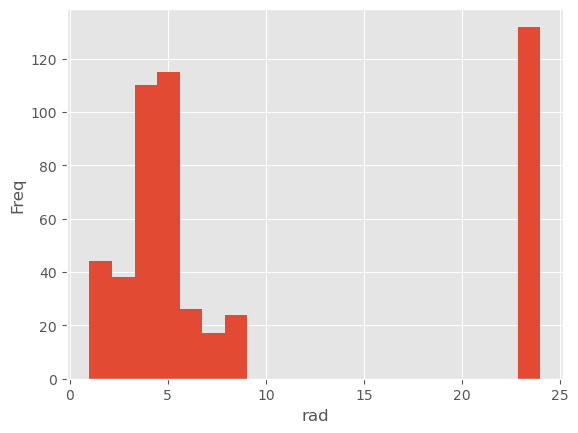

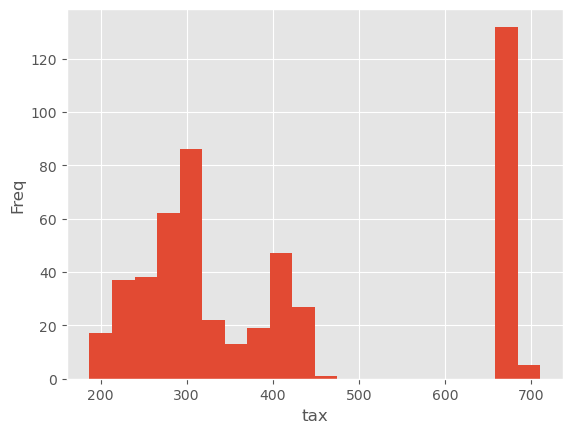

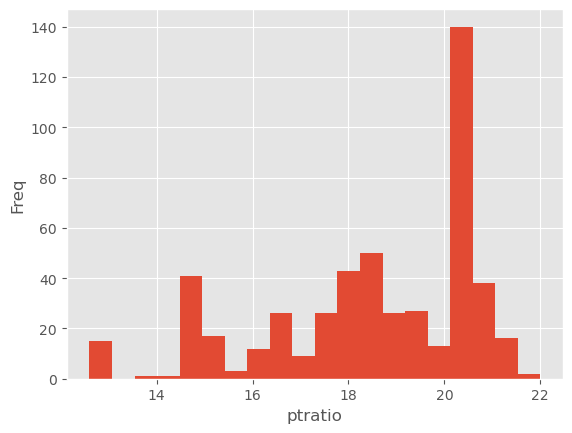

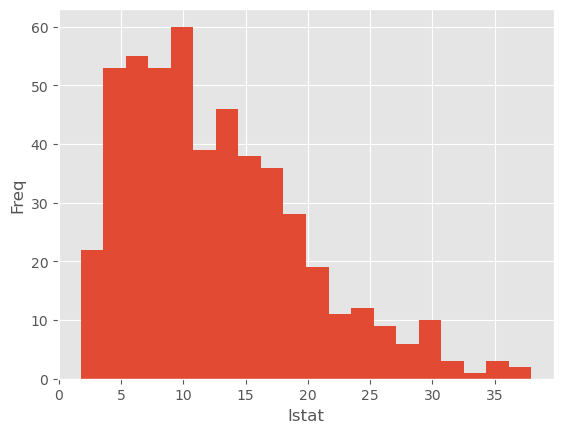

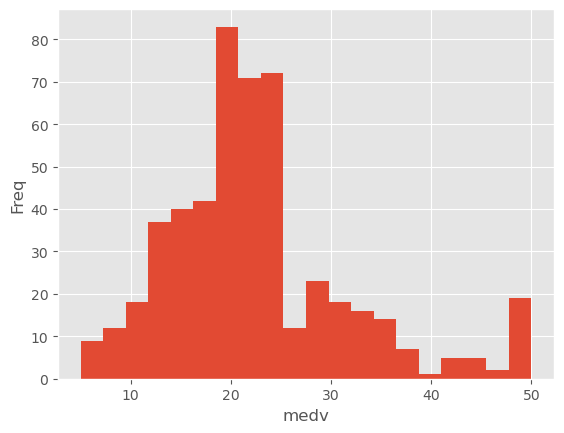

In [11]:
for name in df.columns:

    plt.hist(df[name], bins = 20)
    plt.xlabel(name)
    plt.ylabel('Freq')
    plt.show()

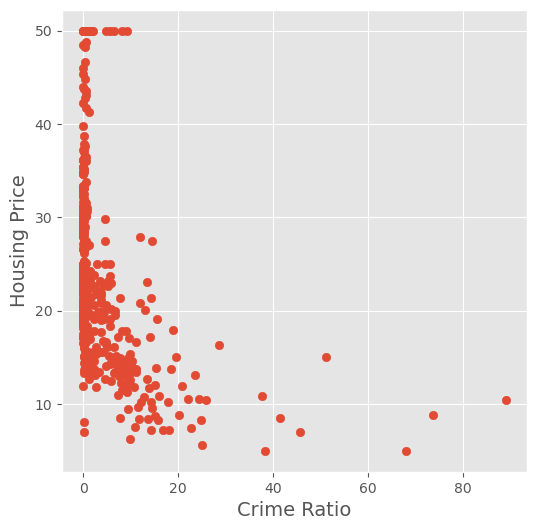

In [12]:
#住宅価格と犯罪率との関係図

fig = plt.figure(figsize=(6,6))
plt.style.use('ggplot')

plt.scatter(df['crim'], df['medv'])

plt.xlabel("Crime Ratio", fontsize =14)
plt.ylabel("Housing Price", fontsize =14)

plt.show()

<Axes: >

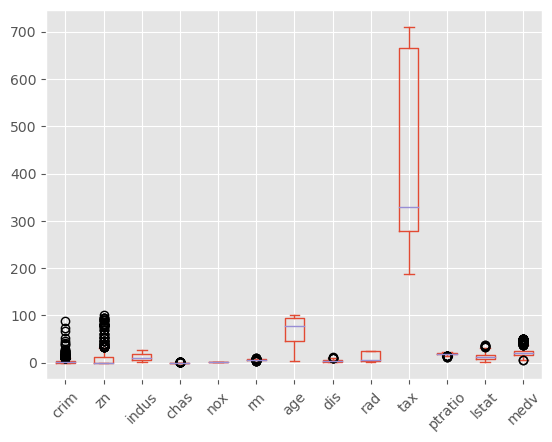

In [13]:
df.plot.box(rot=45)

# 4. scikit-learnによる回帰モデルの比較

## 4.1  データセットの分割（Data set splitting）

In [14]:
#価格を目的変数として、それ以外を説明変数とする
x = df.iloc[0:, 0:12] # 説明変数行列
y = df.iloc[0:, -1]   # 目的変数

In [15]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [16]:
y

1      24.0
2      21.6
3      34.7
4      33.4
5      36.2
       ... 
502    22.4
503    20.6
504    23.9
505    22.0
506    11.9
Name: medv, Length: 506, dtype: float64

In [17]:
#データセットの分割のライブラリの読み込み
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2,   # CV用データ分割
                                                    random_state=42
                                                    )  

In [18]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
478,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,24.91
16,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,8.47
333,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,7.83
424,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,23.29
20,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,18.66
271,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,13.00
349,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,5.99
436,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,23.27


## 1. 線形重回帰
### 1.1 モデル構築

In [19]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression

#予測器の作成
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 1.2 モデルの評価：精度の計算
### 訓練データ

In [20]:
#予測値
y_pred_train = model.predict(X_train)

In [21]:
#係数（重み）と切片
np.set_printoptions(suppress=True, precision=3)

print('係数：{}'.format(model.coef_))
print('切片：{}'.format(model.intercept_))

係数：[ -0.127   0.031   0.025   3.049 -18.183   4.24   -0.004  -1.466   0.24
  -0.011  -0.895  -0.538]
切片：36.97046906703038


In [22]:
# 訓練データの精度
print('訓練データスコア: {}'.format(model.score(X_train, y_train)))

訓練データスコア: 0.739801993681731


### テストデータ

In [23]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

# テストデータの精度
print('テストデータスコア: {}'.format(model.score(X_test, y_test)))

テストデータスコア: 0.6893967884614758


### 観測値-予測値プロット

**Observed-Predicted plot"（観測値-予測値プロット）**  
機械学習モデルの予測結果と実際の観測値との比較を視覚化するためのグラフです。このプロットは、モデルのパフォーマンスを評価し、予測結果の信頼性や誤差の傾向を把握するのに役立ちます。

以下に、Observed-Predicted plotの基本的な手順と考え方を説明します。

1. モデルのトレーニングとテスト:
まず、データセットをトレーニングセットとテストセットに分割し、機械学習モデルをトレーニングします。

1. 予測の取得:
テストセットの入力データに対してモデルを適用し、予測値を取得します。

1. 観測値と予測値のペアの作成:
テストセットの観測値（正解データ）と、対応する予測値のペアを作成します。

1. グラフのプロット:
観測値を横軸に、予測値を縦軸にとって、散布図を作成します。各データポイントは、観測値と予測値のペアを表します。

1. 理想的な予測線の追加（オプション）:
グラフには、観測値と予測値が完全に一致する理想的な予測線を追加することがあります。この予測線に近い点は、モデルの良い予測を示します。

Observed-Predicted plotは、観測値と予測値の間の関係を直感的に理解するのに役立ちます。理想的な場合、データポイントは予測線の周囲に均等に分布しており、予測値が観測値に近いことを示します。一方、誤差が大きい場合や、特定の予測範囲で誤差が特に顕著な場合、データポイントは予測線から離れて分布していることがわかります。

Observed-Predicted plotは、回帰モデルの評価や異常検出の可視化など、様々な応用で使用されます。予測の信頼性やパターンの特定など、モデルの解釈と改善に役立つ重要なツールです。

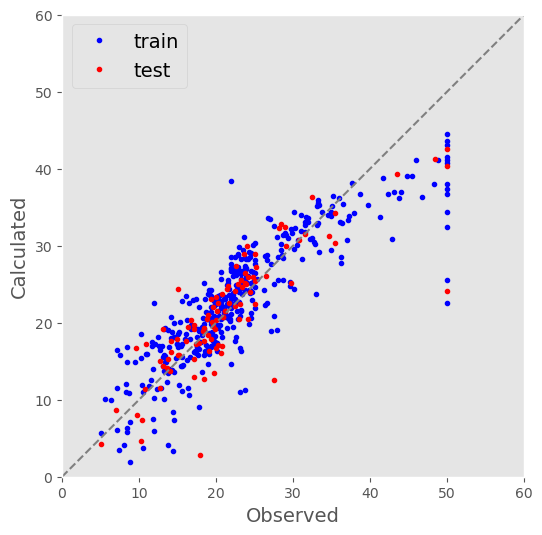

In [24]:
fig = plt.figure(figsize=(6,6))

plt.plot(y_train, y_pred_train, '.', c = 'blue', label ='train')
plt.plot(y_test, y_pred_test, '.', c = 'red', label ='test')

plt.plot([0, 100], [0, 100], linestyle='--', color ='gray')  # 対角線のプロット

plt.axis('square')
plt.xlabel('Observed',fontsize = 14)
plt.ylabel('Calculated',fontsize = 14)

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(fontsize = 14)
plt.grid()

plt.show()

## 2.リッジ回帰
### 2.1 モデル構築

In [25]:
# リッジ回帰モデル
from sklearn.linear_model import Ridge

#予測器の作成
model = Ridge()
model.fit(X_train, y_train)

Ridge()

## 2.2 モデルの評価：精度の計算
### 訓練データ

In [26]:
#予測値
y_pred_train = model.predict(X_train)
# 訓練データの精度
print('訓練データスコア: {}'.format(model.score(X_train, y_train)))

訓練データスコア: 0.7374523136496496


### テストデータ

In [27]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

# テストデータの精度
print('テストデータスコア: {}'.format(model.score(X_test, y_test)))

テストデータスコア: 0.6862699168016533


### 観測値-予測値プロット

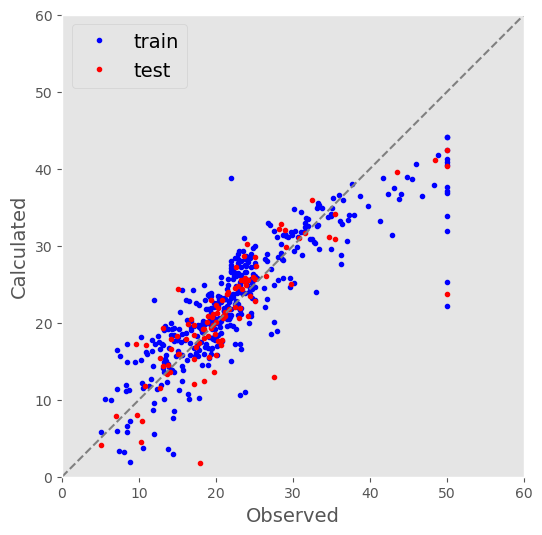

In [28]:
fig = plt.figure(figsize=(6,6))

plt.plot(y_train, y_pred_train, '.', c = 'blue', label ='train')
plt.plot(y_test, y_pred_test, '.', c = 'red', label ='test')

plt.plot([0, 100], [0, 100], linestyle='--', color ='gray')  # 対角線のプロット

plt.axis('square')
plt.xlabel('Observed',fontsize = 14)
plt.ylabel('Calculated',fontsize = 14)

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(fontsize = 14)
plt.grid()

plt.show()

## 2. ランダムフォレスト

In [29]:
#ランダムフォレスト回帰

from sklearn.ensemble import RandomForestRegressor

#予測器の作成
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

### 訓練データ

In [30]:
#予測値
y_pred_train = model.predict(X_train)
# 訓練データの精度
print('訓練データスコア: {}'.format(model.score(X_train, y_train)))

訓練データスコア: 0.9642186203098274


### テストデータ

In [31]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

# テストデータの精度
print('テストデータスコア: {}'.format(model.score(X_test, y_test)))

テストデータスコア: 0.8961363723940667


### 観測値-予測値プロット

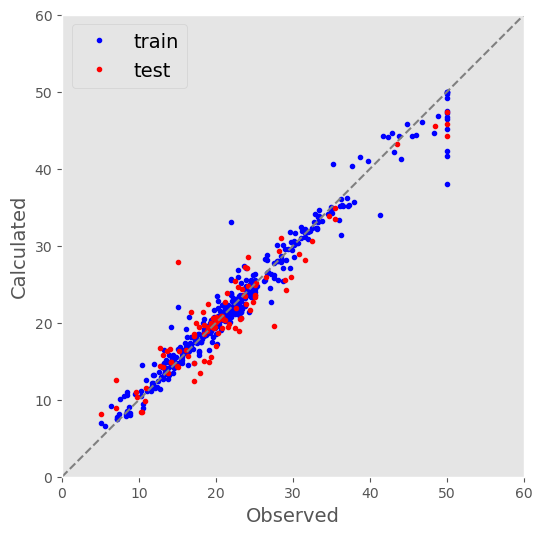

In [32]:
fig = plt.figure(figsize=(6,6))

plt.plot(y_train, y_pred_train, '.', c = 'blue', label ='train')
plt.plot(y_test, y_pred_test, '.', c = 'red', label ='test')

plt.plot([0, 100], [0, 100], linestyle='--', color ='gray')  # 対角線のプロット

plt.axis('square')
plt.xlabel('Observed',fontsize = 14)
plt.ylabel('Calculated',fontsize = 14)

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(fontsize = 14)
plt.grid()

#plt.savefig('../results/9.3-yyplot-rdkitpls.jpg')
plt.show()

# Closing：おわりに


さらに機械学習モデルの精度をあげるために、**k-foldクロスバリデーション**や**ハイパーパラメータ調整**を行います。

**k-foldクロスバリデーション（k-fold cross-validation）**  

機械学習モデルの性能を評価するための手法です。通常、データセットをトレーニングセットとテストセットに分割してモデルを評価しますが、クロスバリデーションでは、データセットを複数の部分集合に分割し、それぞれをトレーニングセットとテストセットとして使用します。

具体的な手順は以下の通りです。

1. データセットをk個の部分集合（フォールド）に分割します。通常、kは5または10がよく使用されます。

1. k個の部分集合のうちの1つをテストセットとし、残りのk-1個の部分集合をトレーニングセットとします。

1. モデルをトレーニングセットで学習させ、テストセットで評価します。

1. ステップ2-3をk回繰り返し、k個のモデルを作成し、評価します。

1. k回の評価結果を平均化し、モデルの性能を推定します。

クロスバリデーションは、モデルの性能を正確に評価するために使用されます。各フォールドがテストセットとして使用されるため、全てのデータがモデルの評価に使用されるため、モデルの性能評価がより信頼性の高い結果を提供します。また、データの分割方法による結果のバイアスを軽減する効果もあります。

クロスバリデーションは、ハイパーパラメータのチューニングや異なるモデルの比較など、機械学習のさまざまなタスクで広く使用されます。

**ハイパーパラメータ（hyperparameter）**  

機械学習モデルのハイパーパラメータは、モデルの振る舞いやパフォーマンスに影響を与える設定値です。ハイパーパラメータの適切な調整は、モデルの性能を最適化するために非常に重要です。ハイパーパラメータ調整の一般的な手法には、グリッドサーチ、ランダムサーチ、ベイズ最適化などがあります。

* **グリッドサーチ（Grid Search）**：
グリッドサーチでは、事前に指定されたハイパーパラメータ値の組み合わせの中から最適な組み合わせを探索します。具体的には、調整したいハイパーパラメータの範囲を指定し、それらのパラメータの組み合わせをすべて試して最適な組み合わせを見つける手法です。ただし、組み合わせの数が非常に多い場合は計算コストが高くなる可能性があります。

* **ランダムサーチ（Random Search）**：
ランダムサーチでは、ハイパーパラメータの範囲内からランダムに組み合わせを選択し、それらの組み合わせでモデルを評価します。グリッドサーチと比較して効率的な探索が可能であり、特定の範囲内でのハイパーパラメータの重要度を把握するのに役立ちます。

* **ベイズ最適化（Bayesian Optimization）**：
ベイズ最適化は、事前の知識を利用して最適なハイパーパラメータを探索する手法です。モデルの評価結果を利用して、パラメータ空間内で最適な探索を行います。ベイズ最適化は、少ない評価回数で最適なハイパーパラメータを見つけることができる場合があります。

これらの手法は、ハイパーパラメータの探索空間と目的関数の特性に合わせて選択する必要があります。また、クロスバリデーションなどを使用して、ハイパーパラメータの選択によるモデルの性能を適切に評価することも重要です。